Análise Exploratória

In [1]:
import pandas as pd

dados = pd.read_csv('aluguel.csv', sep=';') # delimiter=';' também funciona

In [2]:
# O método "describe" realiza algumas estatísticas descritivas básicas dos dados em um DataFrame
# As estatísticas descritivas que o método "describe" calcula são:
# - contagem
# - média
# - desvio padrão
# - mínimo
# - quartis
# - máximo
dados.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


Para o nosso contexto, precisamos remover os imóveis de tipo comercial, pois não se refere ao preço de aluguéis para casas residenciais

In [3]:
dados.Tipo.unique() # Retorna todos os tipos únicos que temos na nossa base de dados

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [4]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [5]:
# Query retorna linhas específicas de um DataFrame com base em uma condição específica
# @ serve para adquirirmos uma variável

# Queremos todos os tipos que NÃO estão dentro de imoveis_comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

O processo de Análise Exploratória de Dados (EDA) consiste em buscar entender como são estruturados os dados que queremos analisar.

É um processo de caráter investigativo, onde tentamos compreender várias características, como: os valores presentes nas colunas, os tipos de estrutura de dados, verificar se são dados qualitativos ou quantitativos, se há valores faltantes ou incomuns.

Por isso, nesse momento, perguntas sobre os dados são sempre bem-vindas. Elas irão guiar todo o processo de análise, e, através das ferramentas disponíveis, como o nosso querido Pandas, iremos buscar por respostas.

Algumas perguntas que podemos fazer nesse momento:

1. Quais os valores médios de aluguel por tipo de imóvel?
2. Qual o percentual de cada tipo de imóvel na nossa base de dados?

### Pergunta 1: Quais os valores médios de aluguel por tipo de imóvel?

In [6]:
# 1. Quais os valores médios de aluguel por tipo de imóvel?
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [7]:
# A média geral dos valores de imóvel sem considerar o tipo do imóvel
media_valor_geral = dados['Valor'].mean()

print(media_valor_geral)

12952.659715265761


Caso quisermos adquirir médias de todas as colunas numéricas do nosso dataframe, também é possível com o seguinte código abaixo:

In [8]:
# O paramêtro do método mean indica que só será realizado a média para colunas numéricas
dados_agrupados = dados.groupby('Tipo').mean(numeric_only=True)

# Da mesma forma que o código acima, retorna a média, porém, de todas as colunas, onde cada linha representa a média de cada coluna, agrupados por tipo de imóvel
dados_agrupados


,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


Porém queremos apenas responder a pergunta 1, para isto:

É possível observar que temos 2 colunas úteis para essa pergunta:

- Tipo
- Valor

In [9]:
# Realiza o agrupamento dos dados pelo "Tipo" de imóvel
dados_agrupados = dados.groupby(by='Tipo') # Também pose ser passado como paramêtro do by um array, exemplo: ['coluna1', 'coluna2']

# Em seguida, adquire a coluna "Valor" e realiza a média
media_valor_imoveis = dados_agrupados['Valor'].mean() # Aqui não precisamos do parametro "numeric_only", pois temos certeza que a coluna "Valor" é do tipo numérica

media_valor_imoveis

Tipo
Apartamento                      4744.614648
Box/Garagem                      1899.756098
Casa                             6793.454922
Casa Comercial                  14478.264151
Casa de Condomínio              11952.061245
Casa de Vila                     1574.369478
Chácara                          4900.000000
Conjunto Comercial/Sala         14715.045521
Flat                             4546.189076
Galpão/Depósito/Armazém         53407.062600
Hotel                           25000.000000
Indústria                      120000.000000
Loft                             2557.882353
Loja Shopping/ Ct Comercial      8126.178862
Loja/Salão                      13769.646770
Loteamento/Condomínio           22000.000000
Pousada/Chalé                    1480.000000
Prédio Inteiro                 498637.239203
Quitinete                        1246.840909
Studio                           2400.000000
Sítio                           12499.000000
Terreno Padrão                  32567.714286
Name:

Também podemos ordenar os dados, da menor média para a maior média (ordem crescente)

In [10]:
# Antes precisamos de transformar em um dataFrame, para isto, apenas colocamos 2 colchetes ao invés de 1
media_valor_imoveis = dados_agrupados[['Valor']].mean()

# Adicionamos como paramêtro da ordenação a coluna "Valor"
media_valor_imoveis = media_valor_imoveis.sort_values(by='Valor', ascending=True) # podemos simplificar como: sort_values('Valor')

Queremos visualizar o resultado de uma forma gráfica, então iremos plotar os dados das médias por imóveis

<Axes: ylabel='Tipo'>

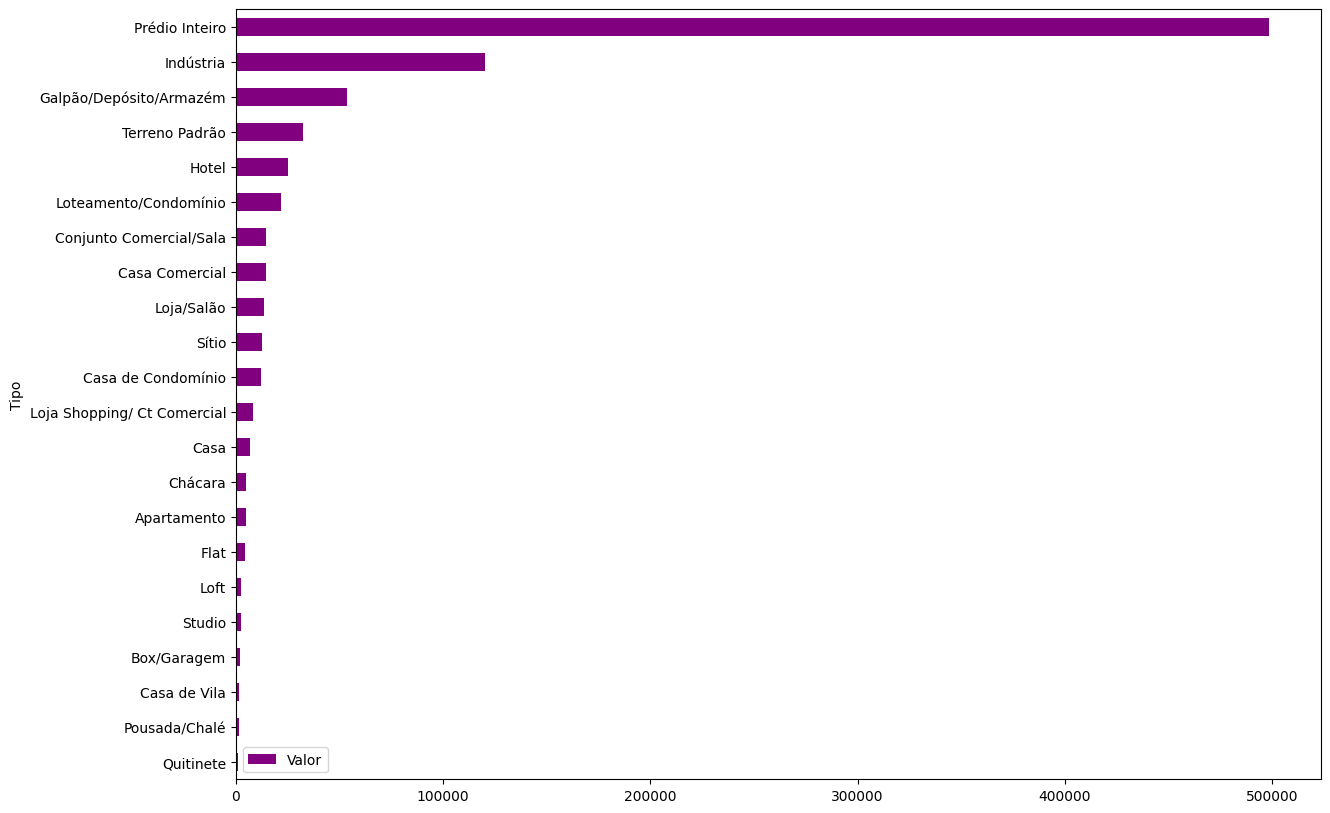

In [11]:
# barh -> gráfico de barras horizontais
# bar -> gráfico de barras verticais

media_valor_imoveis.plot(
    kind='barh',
    figsize=(14,10), # Figsize ajusta o tamanho do gráfico
    color = 'purple'
    )

O gráfico anterior contem dados dos imóveis comerciais, precisamos utilizar o dataset apenas com os imóveis residenciais.

Já fizemos este tratamento lá em cima, então podemos apenas utilizar a variavel "df", que esta armazenada todos os imóveis residenciais.

In [12]:
# Aqui faremos todo o processo do cálculo novamente, porém em poucas linhas

media_valor_residencias = df.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values('Valor')
media_valor_residencias

,Valor
Tipo,
Quitinete,1246.840909
Casa de Vila,1574.369478
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Casa,6793.454922
Casa de Condomínio,11952.061245


<Axes: ylabel='Tipo'>

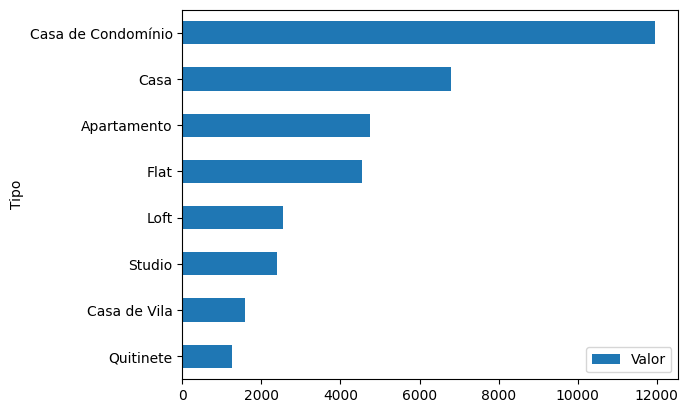

In [13]:
media_valor_residencias.plot(
    kind='barh'
)

### Pergunta 2: Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [14]:
# Iremos utilizar a variavel "df", pois contem os dados apenas de imóveis residenciais
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

In [15]:
# O value_counts sozinho irá retornar apenas o resultado númerico
ocorrencias = df['Tipo'].value_counts() # Equivalente: df.groupby('Tipo')['Tipo'].value_counts()
ocorrencias

Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64

In [16]:
# O parametro normalize como True retorna os valores em percentual
ocorrencias = df.Tipo.value_counts(normalize=True)
ocorrencias

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [17]:
# to_frame converte a Series para um DataFrame
# A coluna de valores proporcionais, quando no dataFrame, será nomeada automaticamente como "proportion"
ocorrencias = ocorrencias.to_frame().sort_values('proportion')
ocorrencias

,proportion
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


In [18]:
# Tudo na mesma linha ficaria:
ocorrencias = df['Tipo'].value_counts(normalize=True).to_frame().sort_values('proportion')

# Também podemos renomear a coluna proportion para outro nome, exemplo:
ocorrencias.rename(columns={'proportion': 'Percentuais'}, inplace=True)

<Axes: xlabel='Tipo de Imóveis', ylabel='Ocorrencias (%)'>

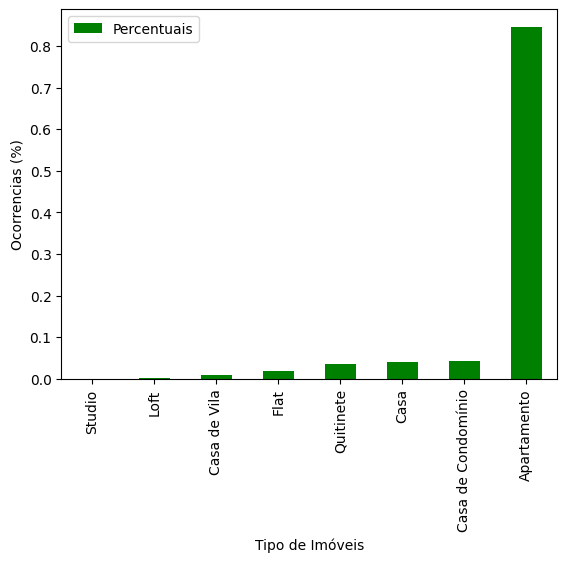

In [19]:
# Visualização dos dados
ocorrencias.plot(
    kind='bar',
    color = 'green',
    xlabel='Tipo de Imóveis',
    ylabel='Ocorrencias (%)'
)

### Selecionando apenas os imóveis do tipo do apartamento para passar ao time de ML

In [20]:
df = df.query('Tipo == "Apartamento"')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [21]:
# Cria um novo dataset, porém sem replicar os índices
df.to_csv('aluguel_apartamentos.csv', index=False) 